In [1]:
import cv2
import numpy as np
import steerable_pyramid.davis_method as pyramid
import event_camera.simulator_utils as camera

In [2]:
import os

def extract_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return []
    frames = []
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(rgb_frame)
        frame_count += 1
    cap.release()
    print(f"Extracted {frame_count} frames.")
    return np.array(frames)

def extract_video_segments(video_path):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_size_bytes = frame_width * frame_height * 3
    frames_per_segment = np.floor(2*10e6/frame_size_bytes)
    total_segments = np.ceil(total_frames/frames_per_segment)
    intervals = np.arange(0, total_frames, frames_per_segment)

    desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
    new_folder_path = os.path.join(desktop_path, 'TemporaryVideoSegments')
    try:
        os.makedirs(new_folder_path, exist_ok=True)
        print(f"Temporary folder created: {new_folder_path}")
    except Exception as e:
        print(f"Error creating temporary folder: {e}")

    for interval in intervals:
        cap.set(cv2.CAP_PROP_POS_FRAMES, interval)
        frames = []
        segment_count = 0
        for frame_idx in range(interval, interval+frames_per_segment-1):
            ret, frame = cap.read()
            frames.append(frame)
        cap.release()

        segment_count += 1
        file_path = os.path.join(new_folder_path, f'Segment{segment_count}.npy')
        frames = np.array(frames)
        np.save(file_path, frames)
        print(f"Saved video segment {segment_count} to Desktop.")

In [3]:
path = '/Volumes/Omkar 5T/video_dataset/chips1.avi'
frames = extract_specific_frames(path, 4400, 6400)

Extracted 2001 frames.


In [4]:
# more information can be extracted at lower frequencies, which makes it perfet for low light conditions
# threshold is completely based on the cut-off frequency and the maxmium allowable events for any pixel
# it is currently tuned manually to 0.00007

video_fps = 30
sampling_period = 1/video_fps
cutoff_freq = 0.0003
pos_thresh, neg_thresh = 0.0000007, 0.0000007
pos_frames, neg_frames, evts_video = camera.event_video(frames, sampling_period, cutoff_freq, pos_thresh, neg_thresh)

In [5]:
window_name = 'Video Playback'
frame_rate = 120
delay = 1/frame_rate
cv2.namedWindow(window_name)
for frame in evts_video:
    cv2.imshow(window_name, frame)
    if cv2.waitKey(int(delay*1000)) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

2024-06-03 23:34:19.552 Python[85939:6035551] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


In [6]:
# def save_video_from_tensor(tensor, output_path, fps=90):
#     num_frames, height, width = tensor.shape
#     fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#     out = cv2.VideoWriter(output_path, fourcc, fps, (width, height), False)
#     for i in range(num_frames):
#         frame = tensor[i]
#         out.write(frame)
#     out.release()

# output_path = 'video.mp4'
# save_video_from_tensor(evts_video, output_path)
# print(f"Video saved at {output_path}")

/Users/omkarpatil/Documents/event_based_visual_microphone/steerable_pyramid/davis_method.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
  bands[:, (b-1)] = band.flatten()


Progress: 0.04997501249375312% done after 0.1878359317779541 seconds.
Progress: 1.0494752623688157% done after 4.214792966842651 seconds.
Progress: 2.048975512243878% done after 8.257676124572754 seconds.
Progress: 3.0484757621189407% done after 12.368620157241821 seconds.
Progress: 4.0479760119940025% done after 16.4096462726593 seconds.
Progress: 5.047476261869066% done after 20.47067403793335 seconds.
Progress: 6.046976511744128% done after 24.701696157455444 seconds.
Progress: 7.04647676161919% done after 28.74102807044983 seconds.
Progress: 8.045977011494253% done after 33.03773212432861 seconds.
Progress: 9.045477261369316% done after 37.03214406967163 seconds.
Progress: 10.044977511244378% done after 40.98830509185791 seconds.
Progress: 11.04447776111944% done after 45.03265309333801 seconds.
Progress: 12.043978010994502% done after 49.119362115859985 seconds.
Progress: 13.043478260869565% done after 53.20245003700256 seconds.
Progress: 14.042978510744627% done after 57.21465206

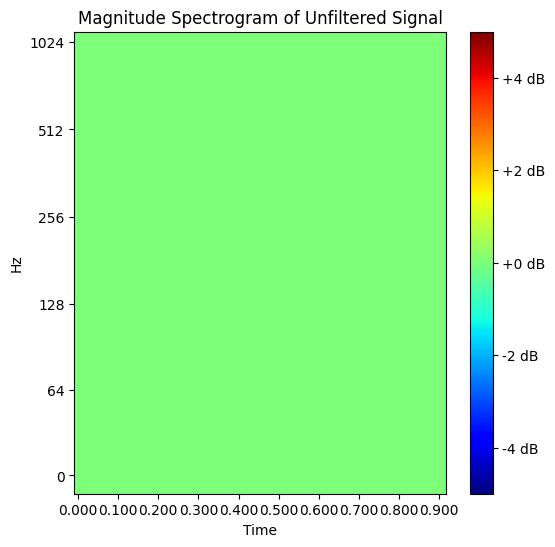

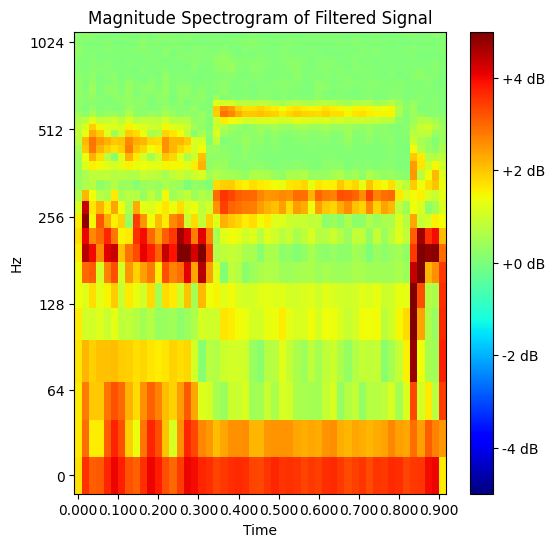

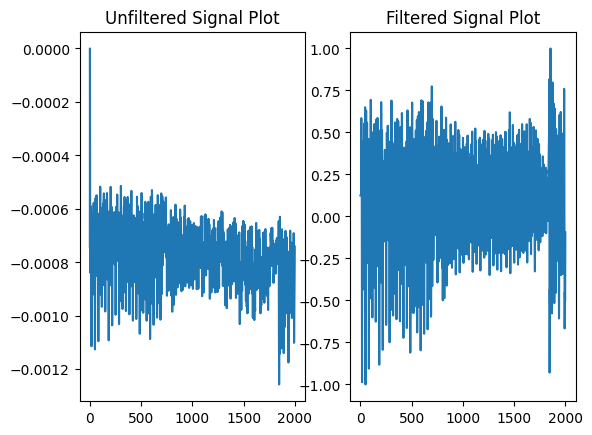

: 

In [7]:
nscales = 2
norientations = 4
framerate = 2200
signal = pyramid.vmSoundFromVideo(evts_video, nscales, norientations, framerate)